# **EDA**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset
df = pd.read_csv('restaurant_menu_optimization_data.csv')

In [27]:
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [29]:
df.describe()

,Price
count,1000.00000
mean,12.81801
std,7.41713
min,2.01000
25%,4.86750
50%,12.53500
75%,17.69000
max,29.84000


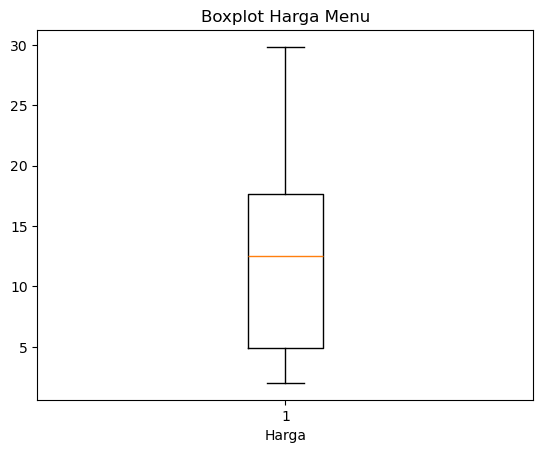

In [30]:
# Boxplot data numerik ('Price')

plt.boxplot(df['Price'])
plt.xlabel('Harga')
plt.title('Boxplot Harga Menu')
plt.show()

Kemiringan data Harga Menu : 0.3589500550270436


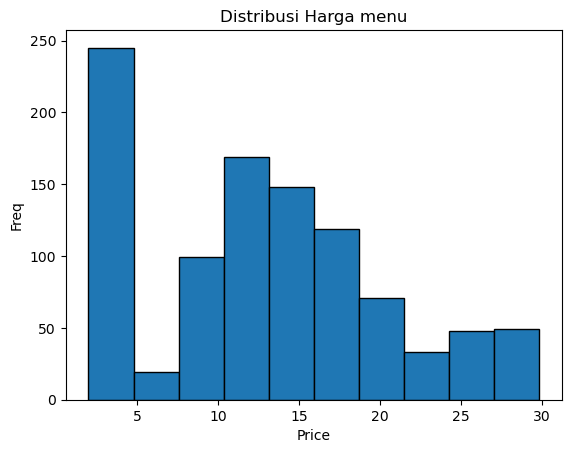

In [31]:
# Visualisasi distribusi untuk data numerik ('Price')

print(f"Kemiringan data Harga Menu : {df['Price'].skew()}")

plt.hist(df['Price'] , edgecolor = 'black' , bins = 10)
plt.xlabel('Price')
plt.ylabel('Freq')
plt.title('Distribusi Harga menu')
plt.show()

In [32]:
# Memisahkan data kategorik dari df
obj_data = df.select_dtypes('object')
obj_data.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Profitability
0,R003,Beverages,Soda,['confidential'],Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",Medium


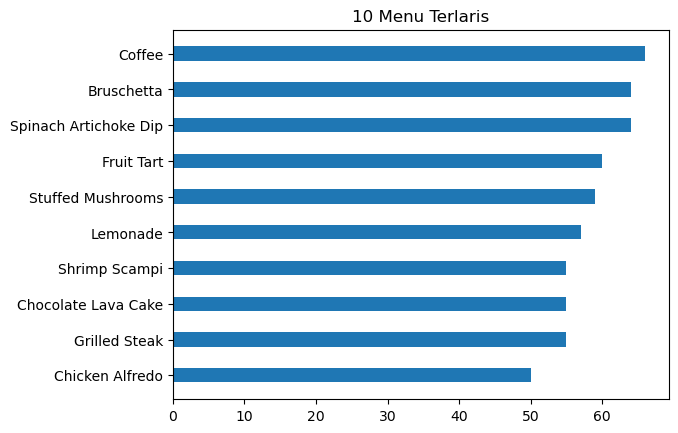

In [33]:
# Menunjukkan 10 menu terlaris
data = obj_data['MenuItem'].value_counts(ascending = True).head(10)
plt.barh(data.index , data.values , height = 0.4)
plt.title('10 Menu Terlaris')
plt.show()

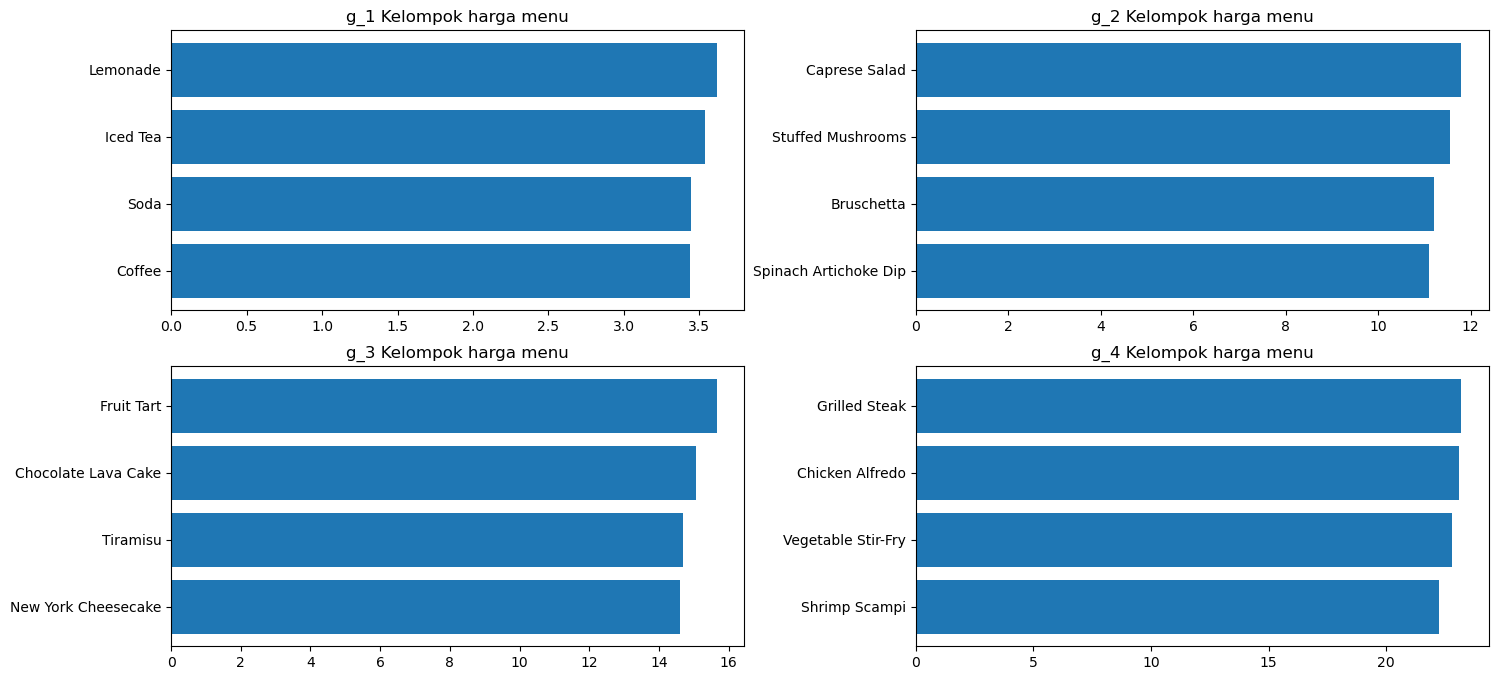

In [34]:
# Harga menu untuk masing-masing kelompok bahan

# Price
ingredients = df['Ingredients'].unique()

g1 = df[df['Ingredients'] == ingredients[0]]
g2 = df[df['Ingredients'] == ingredients[1]]
g3 = df[df['Ingredients'] == ingredients[2]]
g4 = df[df['Ingredients'] == ingredients[3]]

# 시각화

group = [g1 , g2 , g3 , g4]

fig , ax = plt.subplots(2 , 2 , figsize = (17 , 8))
plt.subplots_adjust(wspace = 0.3)
for i in range(4):
    row = i // 2
    col = i % 2

    data = group[i].groupby(['MenuItem'])['Price'].mean()\
    .sort_values()
    ax[row][col].barh(data.index , data.values)
    ax[row][col].set_title(f"g_{i + 1} Kelompok harga menu")

plt.show()

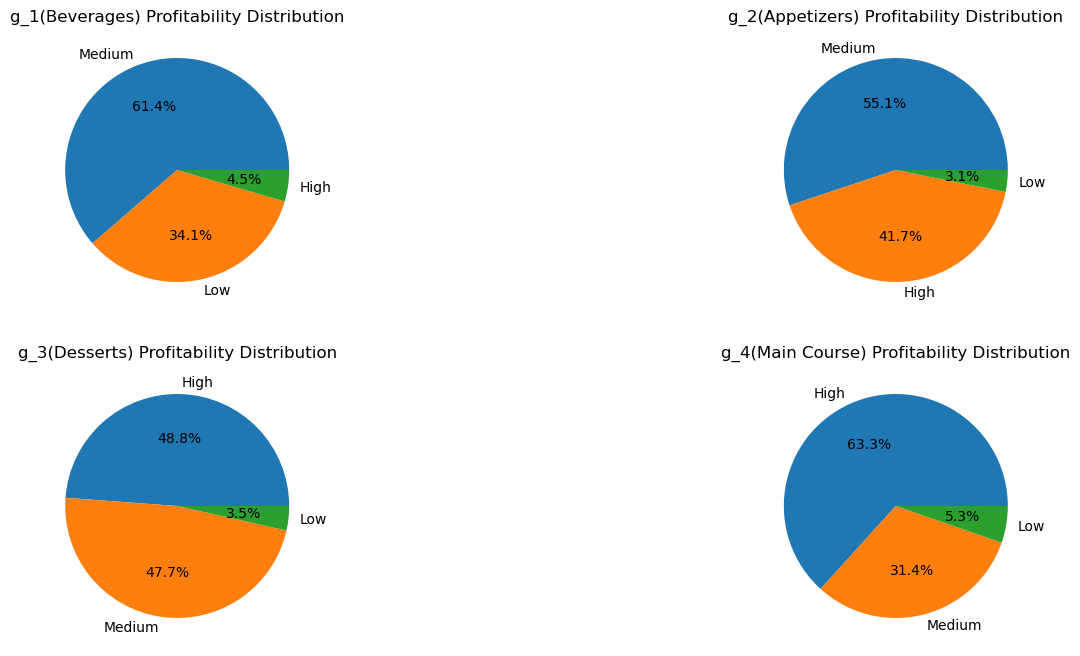

In [35]:
# Keuntungan berdasarkan kategori menu

fig , ax = plt.subplots(2 , 2 , figsize = (17 , 8))
for i in range(4):
    row = i // 2
    col = i % 2

    data = group[i]['Profitability'].value_counts()
    ax[row][col].pie(data , labels = data.index , autopct = '%1.1f%%')
    ax[row][col].set_title(f"g_{i + 1}({group[i]['MenuCategory'].unique()[0]}) Profitability Distribution")

plt.show()

# **DATA PREPROCESSING**

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [37]:
df.sum().isnull()

RestaurantID     False
MenuCategory     False
MenuItem         False
Ingredients      False
Price            False
Profitability    False
dtype: bool

In [39]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['MenuCategory'] = label_encoder.fit_transform(df['MenuCategory'])
df['Profitability'] = label_encoder.fit_transform(df['Profitability'])

In [40]:
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,1,Soda,['confidential'],2.55,1
1,R001,0,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,2
2,R003,2,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,0
3,R003,3,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,0
4,R002,3,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,2


In [41]:
# Extract features and target variable
y = df['Profitability'].values
del df['Profitability']
X = df.values
del df

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [43]:

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
delX, y

ValueError: could not convert string to float: 'R001'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

In [ ]:


# Train and evaluate Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(classification_report(y_test, y_pred))

# Evaluate all models
print("Logistic Regression:")
evaluate_model(y_test, y_pred_lr)
print("\nDecision Tree:")
evaluate_model(y_test, y_pred_dt)
print("\nRandom Forest:")
evaluate_model(y_test, y_pred_rf)


Logistic Regression:
Accuracy: 0.785
Precision: 0.6899375000000001
Recall: 0.785
F1 Score: 0.7331858820779524
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.00      0.00      0.00        25
           2       0.75      0.92      0.83        98

    accuracy                           0.79       200
   macro avg       0.53      0.60      0.56       200
weighted avg       0.69      0.79      0.73       200


Decision Tree:
Accuracy: 0.825
Precision: 0.8189227318110502
Recall: 0.825
F1 Score: 0.8203326338763557
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.63      0.48      0.55        25
           2       0.86      0.87      0.86        98

    accuracy                           0.82       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.82      0.82      0.82       200


Random Forest:
Accurac

c:\Users\acer\anaconda3\envs\dateng\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\envs\dateng\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\envs\dateng\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\envs\dateng